# Exercise 2 - Machine Learning Basics & kNN Classification


### Classification I: Creating a classification algorithm

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
from scipy.spatial.distance import cdist

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import time


#################################### a. Create binary kNN classifier 

class Knn:
# k-Nearest Neighbor class object for classification training and testing

    def __init__(self):
        return
    
    def fit(self, X, y):
      # Save the training data to properties of this class
        self.X_train = X
        self.y_train = y
        return

    def predict(self, x_test, k): # Highlight input as x test as to not confuse
        y_hat = [] # Variable to store the estimated class label for

      # Calculate the distance from each vector in x to the training data
    # While a more intensive, less module driven euclidean distance code was attempted,
    # incorporating the mutli-dimensionality of the intended data was not working accurately.
    # Due to that same dimensionality, np.linalgnorm may not be appropriate due to its application
    # to 1-D and 2-D arrays. Therefore, scipy's other distance function cdist is most appropriate.
        euc_dist = cdist(self.X_train, x_test) # Get distance between X train and X test
        distIndex = np.argpartition(euc_dist, k, axis=0)[:k] # Index & sort said distances
        closestDist = np.take(self.y_train, distIndex) # Reduce arrays within arrays 
        y_hat.append(stats.mode(closestDist,axis=0)[0]) # Get most common label value of closest distance; append to yhat list
      # Return the estimated targets
        return y_hat
        
    
#### Create accuracy method (use scikitlearn get accuracy later on)
def accuracy(y,y_hat): # y = y_test, y_hat = predicted y
    nvalues = len(y)
    y_hat_reshape = np.reshape(y_hat,y.shape) # Reshape predicted matrix to same shape as y test set
    accuracy = sum(y == y_hat_reshape)/nvalues
    return accuracy[0]*100 # Remove value from array; multiply by 100 to get %

print('a. Working version of binary kNN classifier created.\n\n')

#################################### b. Load 4 datasets - use links incase local does not load


A2_X_test_high = 'https://raw.githubusercontent.com/avanigupta1/machine-learning-course/master/data/A2_X_test_high.csv'
A2_X_test_high2 = pd.read_csv(A2_X_test_high)
X_test_high = np.array(A2_X_test_high2)

A2_y_test_high = 'https://raw.githubusercontent.com/avanigupta1/machine-learning-course/master/data/A2_y_test_high.csv'
A2_y_test_high2 = pd.read_csv(A2_y_test_high)
y_test_high = np.array(A2_y_test_high2)


A2_X_test_low = 'https://raw.githubusercontent.com/avanigupta1/machine-learning-course/master/data/A2_X_test_low.csv'
A2_X_test_low2 = pd.read_csv(A2_X_test_low)
X_test_low = np.array(A2_X_test_low2)

A2_y_test_low = 'https://raw.githubusercontent.com/avanigupta1/machine-learning-course/master/data/A2_y_test_low.csv'
A2_y_test_low2 = pd.read_csv(A2_y_test_low)
y_test_low = np.array(A2_y_test_low2)


A2_X_train_low = 'https://raw.githubusercontent.com/avanigupta1/machine-learning-course/master/data/A2_X_train_low.csv'
A2_X_train_low2 = pd.read_csv(A2_X_train_low)
X_train_low = np.array(A2_X_train_low2)

A2_y_train_low = 'https://raw.githubusercontent.com/avanigupta1/machine-learning-course/master/data/A2_y_train_low.csv'
A2_y_train_low2 = pd.read_csv(A2_y_train_low)
y_train_low = np.array(A2_y_train_low2)


A2_X_train_high = 'https://raw.githubusercontent.com/avanigupta1/machine-learning-course/master/data/A2_X_train_high.csv'
A2_X_train_high2 = pd.read_csv(A2_X_train_high)
X_train_high = np.array(A2_X_train_high2)


A2_y_train_high = 'https://raw.githubusercontent.com/avanigupta1/machine-learning-course/master/data/A2_y_train_high.csv'
A2_y_train_high2 = pd.read_csv(A2_y_train_high)
y_train_high = np.array(A2_y_train_high2)



print('b. Testing and training datasets, of both high and low dimensions, \nloaded.\n\n')


#################################### c. Train, predict, and get accuracy for low & high dim
                            ######## datasets, with k=5

# Initiate k=5
k=5

######  Create low dimensional classifier
lowDimClassifier = Knn()
lowDimClassifier.fit(X_train_low , y_train_low)
# Input time
NV_low_start_time = time.time()

y_predicted_low = lowDimClassifier.predict(X_test_low, 5)

NV_low_end_time = time.time()
nonVecLowTime = NV_low_end_time-NV_low_start_time

NV_low_dim_acc = accuracy(y_test_low, y_predicted_low)

print('c. Using the binary kNN classifier created in a, train, predict, and'
      '\n get accuracy for both the high and low dimensional datasets, with k=5.')

print('\n\t\tNon-Vectorized KNN Classifier - Low Dimensional Set\n\t\t\tAccuracy: {:.4f} % \n\t\t\tTime Taken To Predict: {:.4f} Seconds'.format(NV_low_dim_acc, nonVecLowTime))


######  Create high dimensional classifier
highDimClassifier = Knn()
highDimClassifier.fit(X_train_high , y_train_high)
# Input time
NV_high_start_time = time.time()

y_predicted_high = highDimClassifier.predict(X_test_high, 5)
# End & calculate time
NV_high_end_time = time.time()
nonVecHighTime = NV_high_end_time-NV_high_start_time

NV_high_dim_acc = accuracy(y_test_high, y_predicted_high)

print('\n\t\tNon-Vectorized KNN Classifier - High Dimensional Set\n\t\t\tAccuracy: {:.4f} % \n\t\t\tTime Taken To Predict: {:.4f} Seconds\n\n'.format(NV_high_dim_acc, nonVecHighTime))

#################################### d. Use sklearn KNeighbors to test, predict, and check accuracy

print('d. Using the scikitlearn KNeighbours module, perform the same task.'
     '\nCompare speed and accuracy between the vectorized and non-vectorized \ncode.')

##### Train, test low dimensional set

sk_low = KNeighborsClassifier(n_neighbors = 5)
sk_low.fit(X_train_low, np.ravel(y_train_low))

# Input time
V_low_start_time = time.time()

y_sk_low_pred = sk_low.predict(X_test_low)
# End & calculate time
V_low_end_time = time.time()
VecLowTime = V_low_end_time-V_low_start_time

V_low_dim_acc = (accuracy_score(y_test_low, y_sk_low_pred))*100
print('\n\t\tVectorized KNN Classifier - Low Dimensional Set\n\t\t\tAccuracy: {:.4f} % \n\t\t\tTime Taken To Predict: {:.4f} Seconds'.format(V_low_dim_acc, VecLowTime))


##### Train, test high dimensional set

sk_high = KNeighborsClassifier(n_neighbors = 5)
sk_high.fit(X_train_high, np.ravel(y_train_high))

# Input time
V_high_start_time = time.time()

y_sk_high_pred = sk_high.predict(X_test_high)
# End & calculate time
V_high_end_time = time.time()
VecHighTime = V_high_end_time-V_high_start_time

V_high_dim_acc = (accuracy_score(y_test_high, y_sk_high_pred))*100
print('\n\t\tVectorized KNN Classifier - High Dimensional Set\n\t\t\tAccuracy: {:.4f} % \n\t\t\tTime Taken To Predict: {:.4f} Seconds'.format(V_high_dim_acc, VecHighTime))

### Compare performances

print('\n\t\tFor the Low Dimensional Set - \n\t\t\tThe accuracies were equivalent. \n\t\t\tVectorized time taken to predict was {:.4f} \n\t\t\ttimes faster.'.format(nonVecLowTime/VecLowTime))
print('\n\t\tFor the High Dimensional Set - \n\t\t\tThe accuracies were equivalent. \n\t\t\tNon-Vectorized time taken to predict was {:.4f} \n\t\t\ttimes faster.'.format(VecHighTime/nonVecHighTime))
print('\n\t\tThe vectorized module certaily encompasses more '
      '\n\t\tpossibilities and capabilities. In the case of the '
      '\n\t\thigh dimensional dataset it was slightly slower than '
      '\n\t\tthe non-vectorized model, however if there had been '
      '\n\t\tmore explicit code, such as transposing for Euclidean '
      '\n\t\tDistance calculation, the non-vectorized code would '
      '\n\t\thave performed much much slower.')


#################################### e. What are the drawbacks of the prediction process being slow?

print('\n\ne. What are the drawbacks of slow computing processes in regards '
      '\nto supervised learning algorithms?')
print('\n\tWhile there are most likely many drawbacks or aspects to keep' 
      '\n\tin mind, an important one is the tradeoff between speed and '
     '\n\taccuracy. Supervised learning algorithms are created and '
     '\n\tadministered in a variety of industries and for a variety '
     '\n\tof purposes, and some may need the predictions sooner than '
     '\n\tlater. If a particular algorithm is computationally intensive' 
     '\n\tduring either training ortesting, this may cause '
     '\n\tthose administering it to accept a lower level of quality'
     '\n\tfor a faster result. If time is not the main concern but  '
     '\n\tinstead it is monetary, there may be a lack of patience '
     '\n\twith executives if they feel the training process is '
      '\n\tgoing on too long without any substantial output.')


a. Working version of binary kNN classifier created.


b. Testing and training datasets, of both high and low dimensions, 
loaded.


c. Using the binary kNN classifier created in a, train, predict, and
 get accuracy for both the high and low dimensional datasets, with k=5.

		Non-Vectorized KNN Classifier - Low Dimensional Set
			Accuracy: 92.4925 % 
			Time Taken To Predict: 0.0913 Seconds

		Non-Vectorized KNN Classifier - High Dimensional Set
			Accuracy: 99.2993 % 
			Time Taken To Predict: 0.2257 Seconds


d. Using the scikitlearn KNeighbours module, perform the same task.
Compare speed and accuracy between the vectorized and non-vectorized 
code.

		Vectorized KNN Classifier - Low Dimensional Set
			Accuracy: 92.4925 % 
			Time Taken To Predict: 0.0407 Seconds

		Vectorized KNN Classifier - High Dimensional Set
			Accuracy: 99.2993 % 
			Time Taken To Predict: 0.3140 Seconds

		For the Low Dimensional Set - 
			The accuracies were equivalent. 
			Vectorized time taken to predict 

## Bias-variance tradeoff I: Understanding the tradeoff

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

a. Make_moons synthetic dataset created, with 1000 random samples, and noise = 0.35.


b. Make_moons synthetic dataset scatterplot with class differentials.




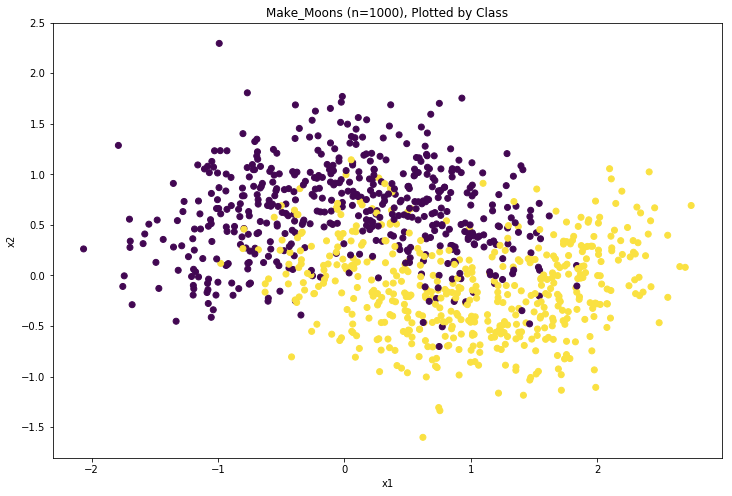

c. Three sets of 100 random data points each sampled from make_moons 
synthetic dataset.

	Each set has been fit with three k-Nearest Neighbour 
	classifiers of k={1,25,50}.

d. Decision boundaries for each classifier plotted below,
 with each row representing a sample, and each column 
representing a value of k.



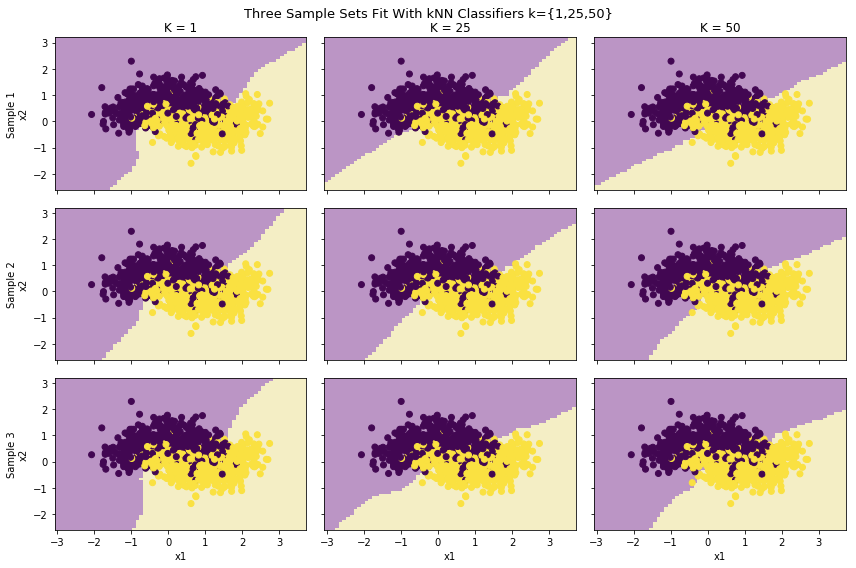

e. Observations and differences in decision boundaries regarding 
different samples and k values.


	 K Specific Observations:

		K = 1: The decision boundary seems almost completely
		accurate. The boundary would change significantly with 
		a class change of any point. The shape of the boundary 
		seems to be an S-Curve.
		 K = 25: The decision boundary flattens slightly from 
		K =1. The separations themselves are less accurate, but
		certainly seem more generalizable with less 
		overfitting.
		 K = 50: The decision boundary certainly seems to be
		underfitting the data. In the first sample,the boundary
		is almost completely linear. It is also biasing the
		majority of the values to one class.

	 Sample Specific Observations:

		As the sample number increases from 1 to 3, the 
		'cleanliness'of the data decreases. The decision 
		boundaries of the first sample seem to be more 
		appropriately fitted than those from sample 2 and 3. 
		This disparity is most vivid in samples 2 and 3

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from mpl_toolkits.axes_grid1 import Grid

import sklearn
from sklearn.datasets import make_moons
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

import random

import warnings
warnings.filterwarnings('ignore')


############################ a. Create synthetic dataset

# Create synthetic dataset, n=1000, noise = .35
mmX, mmY = make_moons(n_samples=1000, noise=.35, random_state=1)

# Create dataframe of dataset with x,y, and class values per data point
mmDF = pd.DataFrame(dict(x=mmX[:,0], 
                         y=mmX[:,1], 
                         label=mmY))
mmDF.columns = ['x1','x2','class']

print('a. Make_moons synthetic dataset created, with 1000 random samples, and noise = 0.35.\n\n')

############################ b. Plot data with class differentials

# Scatterplot

print('b. Make_moons synthetic dataset scatterplot with class differentials.\n\n')

cmap_light = ListedColormap(['#bb95c5', '#f4eec5'])
cmap_bold = ListedColormap(['#420752', '#fae141'])

plt.figure(figsize=(12, 8))
plt.scatter(mmDF['x1'], mmDF['x2'], c = mmDF['class'], cmap=cmap_bold)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Make_Moons (n=1000), Plotted by Class')
plt.show()

############################ c. part 1 -  Create 3 samples of 100 each 


# Create samples
sample1 = mmDF.sample(n=100, random_state=1)
sample2 = mmDF.sample(n=100, random_state=2)
sample3 = mmDF.sample(n=100, random_state=3)

print('c. Three sets of 100 random data points each sampled from make_moons \nsynthetic dataset.\n')

############################ c. part 2 -  Fit 3 KNN per sample; k = {1,25,50}
###### Sample 1
#Sample 1 - k = 1
s1_k1 = KNeighborsClassifier(n_neighbors = 1)
s1_k1.fit(sample1[['x1', 'x2']], sample1['class'])

#Sample 1 - k = 25
s1_k2 = KNeighborsClassifier(n_neighbors = 25)
s1_k2.fit(sample1[['x1', 'x2']], sample1['class'])

#Sample 1 - k = 50
s1_k3 = KNeighborsClassifier(n_neighbors = 50)
s1_k3.fit(sample1[['x1', 'x2']], sample1['class'])


###### Sample 2
#Sample 2 - k = 1
s2_k1 = KNeighborsClassifier(n_neighbors = 1)
s2_k1.fit(sample2[['x1', 'x2']], sample2['class'])

#Sample 2 - k = 25
s2_k2 = KNeighborsClassifier(n_neighbors = 25)
s2_k2.fit(sample2[['x1', 'x2']], sample2['class'])

#Sample 2 - k = 50
s2_k3 = KNeighborsClassifier(n_neighbors = 50)
s2_k3.fit(sample2[['x1', 'x2']], sample2['class'])


###### Sample 3
#Sample 3 - k = 1
s3_k1 = KNeighborsClassifier(n_neighbors = 1)
s3_k1.fit(sample3[['x1', 'x2']], sample3['class'])

#Sample 3 - k = 25
s3_k2 = KNeighborsClassifier(n_neighbors = 25)
s3_k2.fit(sample3[['x1', 'x2']], sample3['class'])

#Sample 3 - k = 50
s3_k3 = KNeighborsClassifier(n_neighbors = 50)
s3_k3.fit(sample3[['x1', 'x2']], sample3['class'])

print('\tEach set has been fit with three k-Nearest Neighbour '
      '\n\tclassifiers of k={1,25,50}.\n')

############################ d. Plot decision boundaries per sample per K

print('d. Decision boundaries for each classifier plotted below,'
      '\n with each row representing a sample, and each column '
      '\nrepresenting a value of k.\n')

# Define X & Y maps
x_min, x_max = mmDF['x1'].min() - 1, mmDF['x1'].max() + 1
y_min, y_max = mmDF['x2'].min() - 1, mmDF['x2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), 
                     np.arange(y_min, y_max, 0.1))

################ Create Plots
######## Sample 1

# Instantiate fig size, properties
fig = plt.figure(figsize=(12, 8))
grid = Grid(fig, rect=111, nrows_ncols=(3,3), axes_pad=0.25, label_mode='L')
fig.suptitle('Three Sample Sets Fit With kNN Classifiers k={1,25,50}\n', fontsize=13)

# Decision boundary - s1k1
Z_s1_k1= s1_k1.predict(np.c_[xx.ravel(), yy.ravel()])
Z_s1_k1 = Z_s1_k1.reshape(xx.shape)
grid[0].pcolormesh(xx, yy, Z_s1_k1, cmap=cmap_light)
grid[0].scatter(mmDF['x1'], mmDF['x2'], c = mmDF['class'], cmap=cmap_bold)
grid[0].set_ylabel("Sample 1\nx2")
grid[0].set_title('K = 1')    

# Decision boundary - s1k2
Z_s1_k2= s1_k2.predict(np.c_[xx.ravel(), yy.ravel()])
Z_s1_k2= Z_s1_k2.reshape(xx.shape)
grid[1].pcolormesh(xx, yy, Z_s1_k2, cmap=cmap_light)
grid[1].scatter(mmDF['x1'], mmDF['x2'], c = mmDF['class'], cmap=cmap_bold)
grid[1].set_title('Decision boundaries')  
grid[1].set_title('\nK = 25')  


# Decision boundary - s1k3
Z_s1_k3= s1_k3.predict(np.c_[xx.ravel(), yy.ravel()])
Z_s1_k3= Z_s1_k3.reshape(xx.shape)
grid[2].pcolormesh(xx, yy, Z_s1_k3, cmap=cmap_light)
grid[2].scatter(mmDF['x1'], mmDF['x2'], c = mmDF['class'], cmap=cmap_bold)
grid[2].set_title('K = 50')

######## Sample 2

# Decision boundary - s2k1
Z_s2_k1= s2_k1.predict(np.c_[xx.ravel(), yy.ravel()])
Z_s2_k1 = Z_s2_k1.reshape(xx.shape)
grid[3].pcolormesh(xx, yy, Z_s2_k1, cmap=cmap_light)
grid[3].scatter(mmDF['x1'], mmDF['x2'], c = mmDF['class'], cmap=cmap_bold)
grid[3].set_ylabel("Sample 2\nx2")

# Decision boundary - s2k2
Z_s2_k2= s2_k2.predict(np.c_[xx.ravel(), yy.ravel()])
Z_s2_k2= Z_s2_k2.reshape(xx.shape)
grid[4].pcolormesh(xx, yy, Z_s2_k2, cmap=cmap_light)
grid[4].scatter(mmDF['x1'], mmDF['x2'], c = mmDF['class'], cmap=cmap_bold)

# Decision boundary - s2k3
Z_s2_k3= s2_k3.predict(np.c_[xx.ravel(), yy.ravel()])
Z_s2_k3= Z_s2_k3.reshape(xx.shape)
grid[5].pcolormesh(xx, yy, Z_s2_k3, cmap=cmap_light)
grid[5].scatter(mmDF['x1'], mmDF['x2'], c = mmDF['class'], cmap=cmap_bold)

######## Sample 3

# Decision boundary - s3k1
Z_s3_k1= s3_k1.predict(np.c_[xx.ravel(), yy.ravel()])
Z_s3_k1 = Z_s3_k1.reshape(xx.shape)
grid[6].pcolormesh(xx, yy, Z_s3_k1, cmap=cmap_light)
grid[6].scatter(mmDF['x1'], mmDF['x2'], c = mmDF['class'], cmap=cmap_bold)
grid[6].set_ylabel("Sample 3\nx2")
grid[6].set_xlabel("x1")

# Decision boundary - s3k2
Z_s3_k2= s3_k2.predict(np.c_[xx.ravel(), yy.ravel()])
Z_s3_k2= Z_s3_k2.reshape(xx.shape)
grid[7].pcolormesh(xx, yy, Z_s3_k2, cmap=cmap_light)
grid[7].scatter(mmDF['x1'], mmDF['x2'], c = mmDF['class'], cmap=cmap_bold)
grid[7].set_xlabel("x1")

# Decision boundary - s3k3
Z_s3_k3= s3_k3.predict(np.c_[xx.ravel(), yy.ravel()])
Z_s3_k3= Z_s3_k3.reshape(xx.shape)
grid[8].pcolormesh(xx, yy, Z_s3_k3, cmap=cmap_light)
grid[8].scatter(mmDF['x1'], mmDF['x2'], c = mmDF['class'], cmap=cmap_bold)
grid[8].set_xlabel("x1")

# Plot 3x3 figure
plt.tight_layout()
plt.show()

############################ e. Differences between different samples; different k
                          ## Which decision boundaries appear to best separate the two classes of data? 
                          ## Which decision boundaries vary the most as the data change?

print('e. Observations and differences in decision boundaries regarding \ndifferent samples and k values.\n')
print('\n\t K Specific Observations:\n'
      '\n\t\tK = 1: The decision boundary seems almost completely' 
      '\n\t\taccurate. The boundary would change significantly with '
      '\n\t\ta class change of any point. The shape of the boundary '
      '\n\t\tseems to be an S-Curve.'
      
      '\n\t\t K = 25: The decision boundary flattens slightly from '
      '\n\t\tK =1. The separations themselves are less accurate, but' 
      '\n\t\tcertainly seem more generalizable with less \n\t\toverfitting.'
      
      '\n\t\t K = 50: The decision boundary certainly seems to be'
      '\n\t\tunderfitting the data. In the first sample,the boundary'
      '\n\t\tis almost completely linear. It is also biasing the' 
      '\n\t\tmajority of the values to one class.')

print('\n\t Sample Specific Observations:\n'
      '\n\t\tAs the sample number increases from 1 to 3, the '
      '\n\t\t\'cleanliness\'of the data decreases. The decision '
      '\n\t\tboundaries of the first sample seem to be more '
      '\n\t\tappropriately fitted than those from sample 2 and 3. '
      '\n\t\tThis disparity is most vivid in samples 2 and 3 at '
      '\n\t\tlevel k=50, when there is clear bias indicated for '
      '\n\t\tthe purple class.')
print('\n\t General Observations:\n'
      '\n\t\tA problem that no value of k seems to be able to'
      '\n\t\tsolve is classifying points of different classes '
      '\n\t\twhen they share the same x1 and x2 values.')



############################ f. Explain the bias-variance tradeoff using the example of 
                          ## the plots you made in this exercise.

print('\nf. Demonstrating the bias-variance tradeoff based on differences in \ndecision boundaries, samples, and k values.\n')
print('\n\tThe bias-variance tradeoff in this case seems to be best' 
      '\n\tportrayed by the level of over or under fitting. When K=1, '
      '\n\tthe predictions are based entirely on one point. This leads '
      '\n\tto high variance, as any class change could cause a change'
      '\n\tin the boundary. However, there is clearly low bias as each '
      '\n\tpoint is fully taken into consideration. When K=50, the '
      '\n\tboundary is smoother with a less variable fit. This causes bias '
      '\n\tas it is basing predictions on a much larger set of points, and'
      '\n\tis being less exact. However, this same aspect gives it lower '
      '\n\tvariance, as a change in these points would not cause a large '
      '\n\timpact in the model. The K=1 boundaries indicate high variance, '
      '\n\tlow bias, high flexibility, and overfitting. The K=50  '
      '\n\tboundaries indicate low variance, high bias, low flexibility,'
      '\n\tand underfitting. The K=25 models seem to lie somewhere in '
      '\n\tbetween.\n')
      
      
print('\n\tIn regards to how the samples play into this, each of the three  '
      '\n\twas taken as a random sample from a single dataset WITH '
      '\n\treplacement. The observations in question e seem to indicate '
      '\n\tsome sort of impact of the later samples, but based on their '
      '\n\torigin, it is unclear if this is a case of data leakage.')



##  Bias-variance trade-off II: Quantifying the tradeoff. 

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

a. Make_moons test dataset created, with 1000 random samples, 
and noise = 0.35.


b. Plot of misclassification errors of training & test data sets 
for k={1..500}.



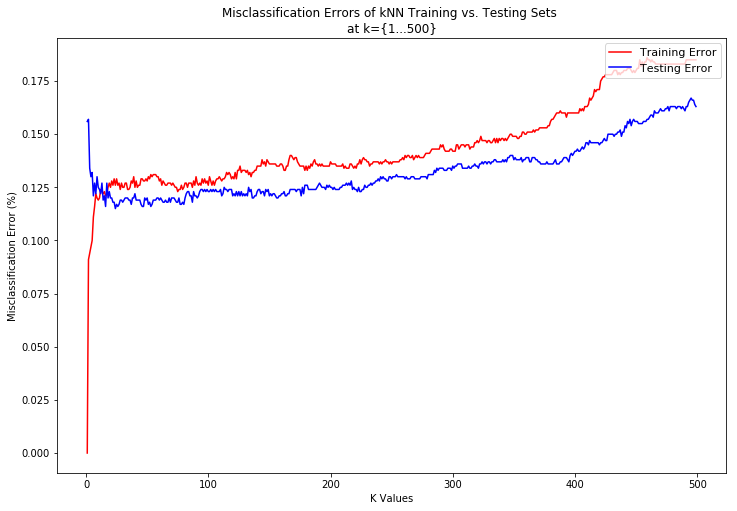

c. Trends in misclassification error plot of training & test data sets for k={1..500}.

	While K is small (e.g. <10), the misclassification error for  
	the training data is small, which is understandable as the 
	model was trained on said data. At that same level of K, 
	the test data misclassification error is much higher, and 
	and proves to be the maximum error of
	 either set at either point. However, as K gets larger,
	the misclassification error levels out around  the same 
	 range for both datasets, with the error level 
	slightly lower throughout. These trends seem to indicate
	that as K gets higher, the classification model gets 
	more accurate for the test set, and less accurate for 
	the training set.
	At around the level of K=200, both data sets' errors seem  
	to increase together. At around K=350, the training error  
	starts to increase much more steeply than the test error,  
	but they both start increasing at a faster rate than had 
	been seen before.


d. Differing v

In [4]:
import sklearn
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier 


############################ a. Create test make_moons dataset

# Create synthetic dataset, n=1000, noise = 3.5
testX, testY = make_moons(n_samples=1000, noise=.35, random_state=2)

# Create dataframe of dataset with x,y, and class values per data point
testDF = pd.DataFrame(dict(x=testX[:,0], 
                           y=testX[:,1], 
                           label=testY))
testDF.columns = ['testX1','testX2','test_class']

print('a. Make_moons test dataset created, with 1000 random samples, \nand noise = 0.35.\n\n')

#### Re-initialize training set

mmX, mmY = make_moons(n_samples=1000, noise=.35, random_state=1)

# Create dataframe of dataset with x,y, and class values per data point
mmDF = pd.DataFrame(dict(x=mmX[:,0], 
                         y=mmX[:,1], 
                         label=mmY))
mmDF.columns = ['trainingX1','trainingX2','training_class']


############################ b. Train training set on k={1..500}; apply to test set; plot classification error

print('b. Plot of misclassification errors of training & test data sets \nfor k={1..500}.\n')

# Create set of k-values and initialize misclassification error (MCE) train/test score lists
k_values=range(1,500)
MCE_train_scores=[]
MCE_test_scores=[]

# Instantiate model
k_nn=KNeighborsClassifier()

# Create K loop
for k in k_values: 
    k_nn.n_neighbors=k 
    k_nn.fit(mmDF[['trainingX1', 'trainingX2']], mmDF['training_class'])
    train_score=k_nn.score(mmDF[['trainingX1', 'trainingX2']], mmDF['training_class'])
    MCEtrain_score = 1- train_score
    test_score=k_nn.score(testDF[['testX1', 'testX2']], testDF['test_class'])
    MCEtest_score = 1- test_score
    MCE_train_scores.append(MCEtrain_score)
    MCE_test_scores.append(MCEtest_score)

# Create plot of training vs. testing MCE
plt.figure(figsize=(12, 8))
plt.title('Misclassification Errors of kNN Training vs. Testing Sets \nat k={1...500}')
plt.plot(k_values,MCE_train_scores, color='red',label='Training Error')
plt.plot(k_values,MCE_test_scores, color='blue',label='Testing Error')
plt.legend(loc='upper right', fontsize = 11)
plt.xlabel('K Values')
plt.ylabel('Misclassification Error (%)')  
plt.show()


############################ c. Trends in plot
print('c. Trends in misclassification error plot of training & test data sets for k={1..500}.\n')
print('\tWhile K is small (e.g. <10), the misclassification error for  '
      '\n\tthe training data is small, which is understandable as the '
      '\n\tmodel was trained on said data. At that same level of K, '
      '\n\tthe test data misclassification error is much higher, and '
      '\n\tand proves to be the maximum error of'
      '\n\t either set at either point. However, as K gets larger,'
      '\n\tthe misclassification error levels out around  the same '
      '\n\t range for both datasets, with the error level '
      '\n\tslightly lower throughout. These trends seem to indicate'
      '\n\tthat as K gets higher, the classification model gets '
      '\n\tmore accurate for the test set, and less accurate for '
      '\n\tthe training set.'
      '\n\tAt around the level of K=200, both data sets\' errors seem  '
      '\n\tto increase together. At around K=350, the training error  '
      '\n\tstarts to increase much more steeply than the test error,  '
      '\n\tbut they both start increasing at a faster rate than had '
      '\n\tbeen seen before.\n\n')


############################ d. What values of k represent high bias and which represent high variance?
print('d. Differing values of K that represent high bias and high variance.\n')
print('\tWhile K is small, it represents low bias and high variance. '
      '\n\tThis can be seen as with small changes of k (within the '
      '\n\ttraining model), the MCE rate increases rapidly (at around '
      '\n\tk=2). This shows the dependence on more points to'
      '\n\tclassify the values to be predicted, seemingly '
      '\n\ttaking the model out of its state of toverfitting'
      '\n\tand spikes the misclassification amount. While K is '
      '\n\tlarge, it represents high bias and low variance. In '
      '\n\thigher levels of k, the changes in the MCE are'
      '\n\tslight, which exemplifies low variance. This is '
      '\n\tdue to the fact that as k is increasing, the '
      '\n\tnoise present in the modeling does not seem to '
      '\n\timpact the MCE significantly at each '
      '\n\tindividual increase in k. \n\n')


############################ e. What is the optimal value of  k  and why?

print('e. Optimal value of K.\n')
print('\tThe optimal value of K is {}.'.format(k_values[MCE_test_scores.index(min(MCE_test_scores))]))
print('\tThis is based off the minimum classification error of the '
      '\n\ttest set. The test score was chosen, as the training '
      '\n\tdata minimum is K=1, which is to expected due to the '
      '\n\tprocess of data training.'
      '\n\tWhen the chosen K has the minimum classification error, '
      '\n\tit implies that it provides the most accurate'
      '\n\t classification model.\n\n')

############################ f. In kNN classifiers, the value of k controls the flexibility of the model; 
                        #### what controls the flexibility of other models?
print('f. Defining flexibility for non-kNN classifier models.\n')
print('\tIn polynomial models, the flexibility is defined by the '
      '\n\tincreased degrees of freedom, or the increase in'
      '\n\tpolynomial level.'
      '\n\tIn thin plate spline models, within the GAM '
      '\n\t(generalized additive model), flexibility can be '
      '\n\tderived from the flexibility of the f(x) function,' 
      '\n\tand the adjustment of the smoothing parameter.'
      '\n\tIn bagging models, flexibility can be defined by '
      '\n\tthe size of the hypothesis space, which is to say'
      '\n\tthe space with a set of models that are the '
      '\n\tpotential output of decision tree learners.')

##  Linear regression and nonlinear transformations


**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

a. Scatterplot of Training Data



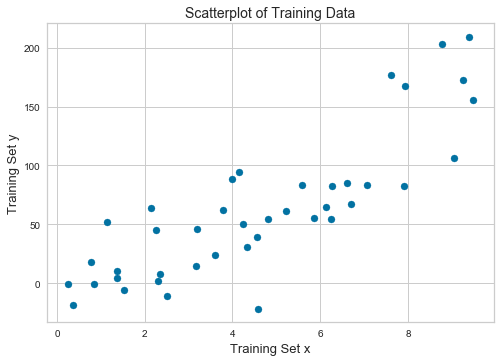


b. Linear Regression Model and Fit Metrics: 

	Estimated Model: 
	y = -21.73078 + 18.30321x 

		R²: 
		0.70146

		Mean Squared Error: 
		1052.5854 

c. Transformed Linear Regression Model and Fit Metrics: 

	The scatterplot shows a potential slight curve that could be 
	described as quadratic. Additionally, the residual plot 
	(as is examined in question f) could also potentially be 
	explained by a quadratic transformation, therefore that 
	will be used as the transformation going forward.


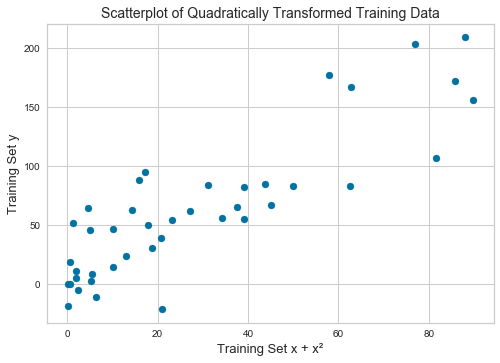

	Estimated Model: 
	y = 8.00734 + 0.47101x + 1.83208x²

		R²: 
		0.74905

		Mean Squared Error: 
		884.7978 


d. Scatterplot of Training Data With Non-Transformed and 
Transformed Linear Models


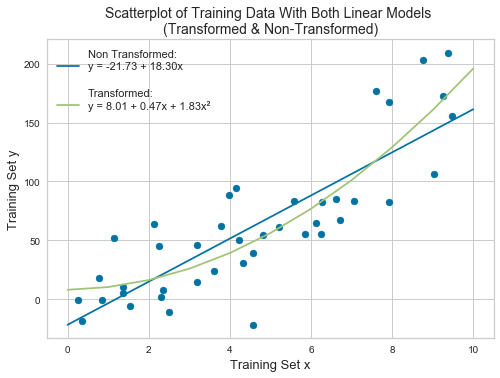


e. Fit Metrics of Both Models When Applied to Test Set

	Basic Linear Model When Applied to Test Set: 

		R²: 0.55565
		Mean Squared Error: 2023.3121 


	Transformed Linear Model When Applied to Test Set: 

		R² : 0.69278
		Mean Squared Error: 1398.8818 


f. Evaluating Basic and Transformed Model Performances, For Both 
Test and Training Sets


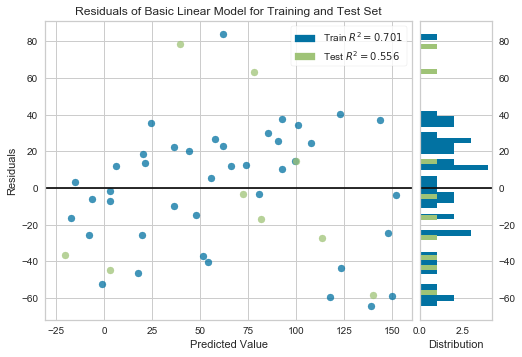

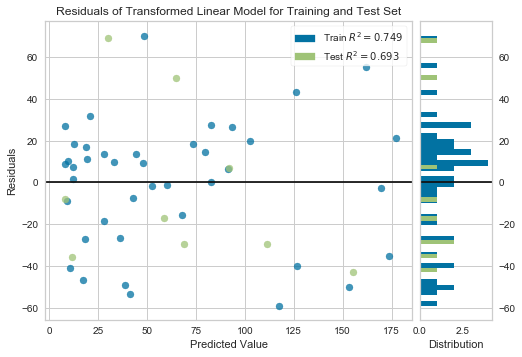


	As depicted in the residual plots above, for both the basic 
	and transformed models, the performance (as defined 
	by R²) is equivalently higher for the training set. 
	This makes sense, as the model was trained to fit that 
	specific data. The R² is higher for both training 
	and test data in the transformed (x+x뀂) model, 
	however the residual plot pattern does not seem too well
	vertically balanced. While this model seems to fit
	better overall, one would need further assessment to 
	make a confident conclusion.

g. Impact of Changes in Data on Predictive Capability

	If the data was larger in value (e.g. x-values in the 
	hundreds), but the response data was similarly
	scaled up, there may not be a drastic change in the 
	model's predictive capability. However, if the
	relationship between the new x & y test arrays were 
	different than that of the training set, this may
	cause our training model to be obsolete. This could 
	easily be the case in real-world situations, in which


In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
from numpy.polynomial.polynomial import polyfit
from pylab import rcParams
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.style import set_palette

x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]


###################### A. Create a scatterplot of the data

# Plot training data in scatterplot
print('a. Scatterplot of Training Data\n')
plt.title('Scatterplot of Training Data', fontsize=14)
plt.scatter(x_train, y_train)
plt.xlabel('Training Set x',fontsize=13)
plt.ylabel('Training Set y',fontsize=13)
plt.show()


###################### B. Estimate linear regression of the training data

# Convert lists to arrays for ease of use
x_train_array = np.asarray(x_train)
y_train_array = np.asarray(y_train)
x_test_array = np.asarray(x_test)
y_test_array = np.asarray(y_test)

# Reshape x array
x_train_array = np.reshape(x_train_array, (41,1))

# Train the model using the training sets
lm = LinearRegression()
model1 = lm.fit(x_train_array, y_train_array)

# Create y predictor set
y_train_pred = lm.predict(x_train_array)

# Print values of note
print('\nb. Linear Regression Model and Fit Metrics: \n')
print('\tEstimated Model: \n\ty = {:.5f} + {:.5f}x \n'.format(lm.intercept_, float(lm.coef_)))
print('\t\tR\u00B2: \n\t\t{:.5f}'.format(r2_score(y_train_array, y_train_pred)))
print('\n\t\tMean Squared Error: \n\t\t{:.4f} \n'.format(mean_squared_error(y_train_array, y_train_pred)))


###################### C. Estimate a transformed linear regression of the training data

print('c. Transformed Linear Regression Model and Fit Metrics: \n')

# Transformation choice explanation
print('\tThe scatterplot shows a potential slight curve that could be '
      '\n\tdescribed as quadratic. Additionally, the residual plot '
      '\n\t(as is examined in question f) could also potentially be '
      '\n\texplained by a quadratic transformation, therefore that '
      '\n\twill be used as the transformation going forward.')

# Plot x^2 transformation
plt.title('Scatterplot of Quadratically Transformed Training Data', fontsize=14)
plt.xlabel('Training Set x + x\u00B2',fontsize=13)
plt.ylabel('Training Set y',fontsize=13)
plt.scatter(np.square(x_train), y_train)
plt.show()

# Transform x array
x_train_array2 = np.square(x_train_array)

# Create combined X data frame
x_transformed_train = np.column_stack((x_train_array, x_train_array2))

# Train the model using the transformed training sets
lm2 = LinearRegression()
model2 = lm2.fit(x_transformed_train, y_train_array)

# Create predictor set
y_train2_pred = lm2.predict(x_transformed_train)

# Print values of note
print('\tEstimated Model: \n\ty = {:.5f} + {:.5f}x + {:.5f}x\u00B2'.format(lm2.intercept_, float(lm2.coef_[0]), float(lm2.coef_[1])))
print('\n\t\tR\u00B2: \n\t\t{:.5f}'.format(r2_score(y_train_array, y_train2_pred)))
print('\n\t\tMean Squared Error: \n\t\t{:.4f} \n'.format(mean_squared_error(y_train_array, y_train2_pred)))

###################### D. Plot the training data with the two estimated regression models

# Plot training data in scatterplot
print('\nd. Scatterplot of Training Data With Non-Transformed and \nTransformed Linear Models')

# Plot initial scatterplot
plt.scatter(x_train, y_train)

# Create x-axis array
x = np.arange(11)

# Apply both estimated lines
plt.title('Scatterplot of Training Data With Both Linear Models \n(Transformed & Non-Transformed)', fontsize=14)
plt.plot(x, lm.intercept_ +  float(lm.coef_)* x, '-', label = 'Non Transformed: \ny = {:.2f} + {:.2f}x \n'.format(lm.intercept_, float(lm.coef_)))
plt.plot(x, lm2.intercept_ +  float(lm2.coef_[0])* x + float(lm2.coef_[1])* (x**2), '-', label = 'Transformed:\ny = {:.2f} + {:.2f}x + {:.2f}x\u00B2\n'.format(lm2.intercept_, float(lm2.coef_[0]), float(lm2.coef_[1])))
plt.legend(loc='upper left', fontsize = 11)
plt.xlabel('Training Set x',fontsize=13)
plt.ylabel('Training Set y',fontsize=13)
plt.show()


###################### e. Apply both regression models to the test set

# Apply both models to test set
print('\ne. Fit Metrics of Both Models When Applied to Test Set')

########## Initial Linear Model

# Reshape x test array
x_test_array = np.reshape(x_test_array, (9,1))

# Reinput training model
model1 = lm.fit(x_train_array, y_train_array)

# Predict test array
y_test_pred = lm.predict(x_test_array)

# Evaluate accuracy
print('\n\tBasic Linear Model When Applied to Test Set: \n')
print('\t\tR\u00B2: {:.5f}'.format(r2_score(y_test_array, y_test_pred)))
print('\t\tMean Squared Error: {:.4f} \n'.format(mean_squared_error(y_test_array, y_test_pred)))


########### Transformed Linear Model


# Transform x test array
x_test_array2 = np.square(x_test_array)

# Create combined X data frame
x_transformed_test = np.column_stack((x_test_array, x_test_array2))

# Reinput training model
model2 = lm2.fit(x_transformed_train, y_train_array)

# Predict test array
y_test_pred2 = lm2.predict(x_transformed_test)

# Evaluate accuracy
print('\n\tTransformed Linear Model When Applied to Test Set: \n')
print('\t\tR\u00B2 : {:.5f}'.format(r2_score(y_test_array, y_test_pred2)))
print('\t\tMean Squared Error: {:.4f} \n'.format(mean_squared_error(y_test_array, y_test_pred2)))

###################### f. Model performance evaluation
print('\nf. Evaluating Basic and Transformed Model Performances, For Both \nTest and Training Sets')

visualizer = ResidualsPlot(LinearRegression(), title='Residuals of Basic Linear Model for Training and Test Set')
visualizer.fit(x_train_array, y_train_array)
visualizer.score(x_test_array, y_test_array)
visualizer.poof() 


visualizer = ResidualsPlot(LinearRegression(), title='Residuals of Transformed Linear Model for Training and Test Set')
visualizer.fit(x_transformed_train, y_train_array)
visualizer.score(x_transformed_test, y_test_array)
visualizer.poof() 

print('\n\tAs depicted in the residual plots above, for both the basic '
      '\n\tand transformed models, the performance (as defined '
      '\n\tby R\u00B2) is equivalently higher for the training set. '
      '\n\tThis makes sense, as the model was trained to fit that '
      '\n\tspecific data. The R\u00B2 is higher for both training '
      '\n\tand test data in the transformed (x+x\uB002) model, '
      '\n\thowever the residual plot pattern does not seem too well' 
      '\n\tvertically balanced. While this model seems to fit'
      '\n\tbetter overall, one would need further assessment to '
      '\n\tmake a confident conclusion.')

###################### g. Drastic change in test set's impact on model function
print('\ng. Impact of Changes in Data on Predictive Capability')
print('\n\tIf the data was larger in value (e.g. x-values in the '
      '\n\thundreds), but the response data was similarly'
      '\n\tscaled up, there may not be a drastic change in the '
      '\n\tmodel\'s predictive capability. However, if the'
      '\n\trelationship between the new x & y test arrays were '
      '\n\tdifferent than that of the training set, this may'
      '\n\tcause our training model to be obsolete. This could '
      '\n\teasily be the case in real-world situations, in which'
      '\n\tthe training model does not generalize well, and overfits '
      '\n\tthe training data with no regard for realistic data'
      '\n\t variance.')